In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
#plt.figure(figsize = (8,8))

# Question 1

## Q1.1 generate data:
(a) $X$ uniform samples between -1 and 1, $X = -1, -0.99, \ldots, 0.99, 1$
 
(b) $Y = 2\cdot X$
 
(c) write a function noise_var(v) which receives an array and adds to it each element samples from a normal random variable with mean 0 and variance 0.01

(d) using the function you wrote in clause (c) generate 
             
$\hspace{5cm} X' = X  + n_1$

(d) using the function you wrote in clause (c) generate
             
$\hspace{5cm} Y' = y  + n_2$


In [2]:
np.arange(-100,100) / 100.0

array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
       -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
       -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
       -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
       -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,
        0.26,  0.27,

In [3]:
X = np.arange(-100,100)/100.0
y = 2*X

def noise_var(v):
    noise = np.random.normal(loc = 0, scale = .01**(1/2))
    return v + noise

In [4]:
x_prime = noise_var(X)
y_prime = noise_var(y)

## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

show it

(a) write a function x_dep_y() which returns True if you claim x and y are statistically dependent and False otherwise (boolean).

(b) write a function show_x_dep_y(x', y') which receives x and y and returns a mathematical element backing your claim

pearson [[ 1.  1.]
 [ 1.  1.]]


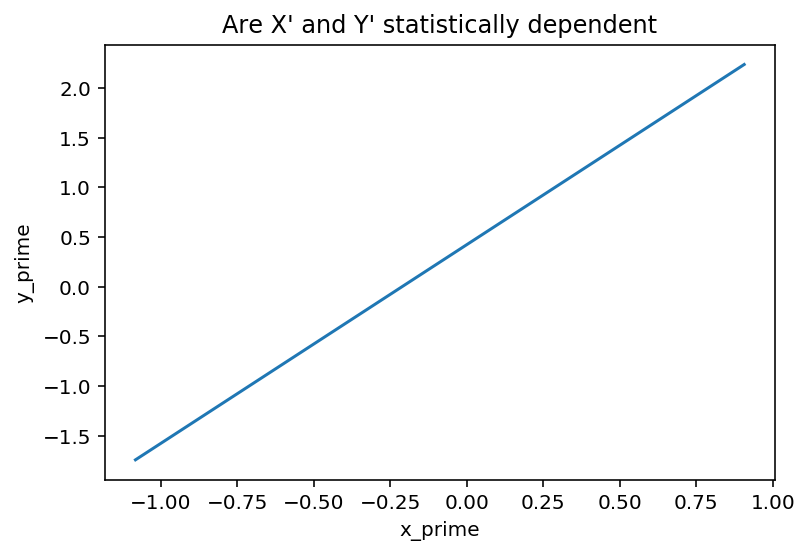

In [5]:
# they are made from each other, yes you can show that they're correlated with pearson
plt.plot(x_prime, y_prime)
plt.title("Are X' and Y' statistically dependent")
plt.xlabel("x_prime")
plt.ylabel("y_prime")

def show_x_dep_y(x,y):
    print "pearson", np.corrcoef(x_prime, y_prime)
# highly correlated

show_x_dep_y(x_prime, y_prime)

# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Write a function movies_corr(movies) which receives a data frame and returns a linear correlation between its columns. Use the function you wrote to compute the linear correlation between critic ratings and people votes

In [6]:
movies = pd.read_csv("./movie_rating.csv")
del movies["Unnamed: 0"]
movies

people_vote    rating
0     60.000000  7.003429
1     73.812940  8.102049
2     87.096481  8.969485
3     70.698214  7.506635
4     71.963592  7.366683
5     77.324780  9.145239
6     66.217744  7.305087
7     76.967948  7.676270
8     71.544984  7.532199
9     87.737301  8.919858
10     0.000000  8.277864
11    72.226742  7.438831
12    73.678649  7.162646
13    65.938289  7.282963
14    69.918449  8.174584
15    81.215610  8.351664
16    90.686229  9.311104
17    89.766294  8.971237
18    92.000000  8.716253
19    72.240256  7.796572

In [7]:

def movie_corr(df):
    return df.corr()
    
movie_corr(movies)

people_vote    rating
people_vote     1.000000  0.336953
rating          0.336953  1.000000

## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot. To achieve this write a function movies_scatter(movies), which receives the movies data frame and returns the output of the plotting command

_ ret={plotting command} _

Text(0,0.5,u'rating')

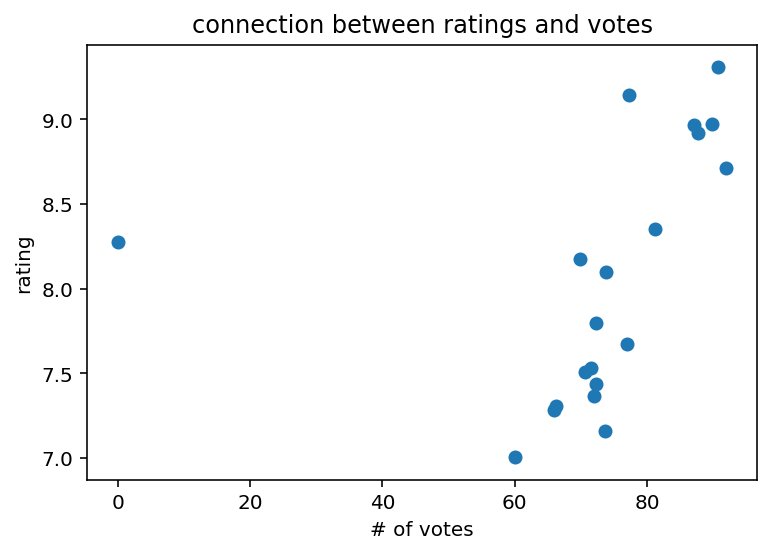

In [8]:
plt.scatter(movies.people_vote, movies.rating)
plt.title("connection between ratings and votes")
plt.xlabel("# of votes")
plt.ylabel("rating")

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. To achieves this, write a function trim_movies(movies), which receives the movies data frame and returns the trimmed data frame. Compute the linear correlation.

In [9]:
def trim_movies(df):
    df_trim = df.copy()
    df_trim =  df_trim.drop(df_trim.people_vote.argmin())
    return df_trim
df_trim = trim_movies(movies)

(c) Draw a scatter plot for the movies selected. Is there a linear connection? Write a function is_linear_conn_movies_trim() which returns True if you claim there's a linear connection and False otherwise (boolean).

people_vote    rating
people_vote     1.000000  0.860947
rating          0.860947  1.000000

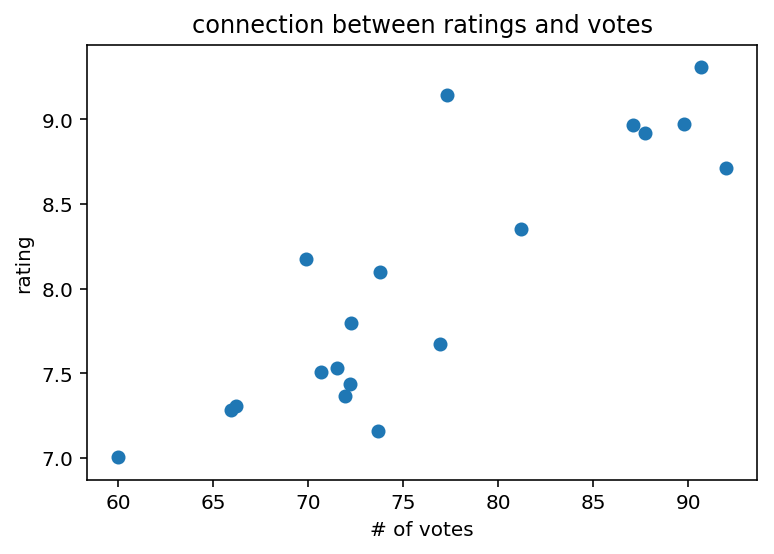

In [10]:
plt.scatter(df_trim.people_vote, df_trim.rating)
plt.title("connection between ratings and votes")
plt.xlabel("# of votes")
plt.ylabel("rating")

movie_corr(df_trim)

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. Draw a scatter plot, and compute the linear correlation.

To achieve these write:

(a) a function rank_movies(movies) which receives the movies data frame and returns the ranked version

(b) a function scatter_movies_rank(ranked_movies) which receives the ranked movies data frame draws a scatter plot and returns the output of the plotting command

(c) a function movies_rank_corr(ranked_movies) which receives the ranked movies data frame and returns the correlation between columns

In [52]:
def rank_df(df):
    return pd.DataFrame([df[col].rank() for col in df]).transpose()

ranked_df = rank_df(df_trim)

Text(0,0.5,u'Rating rank')

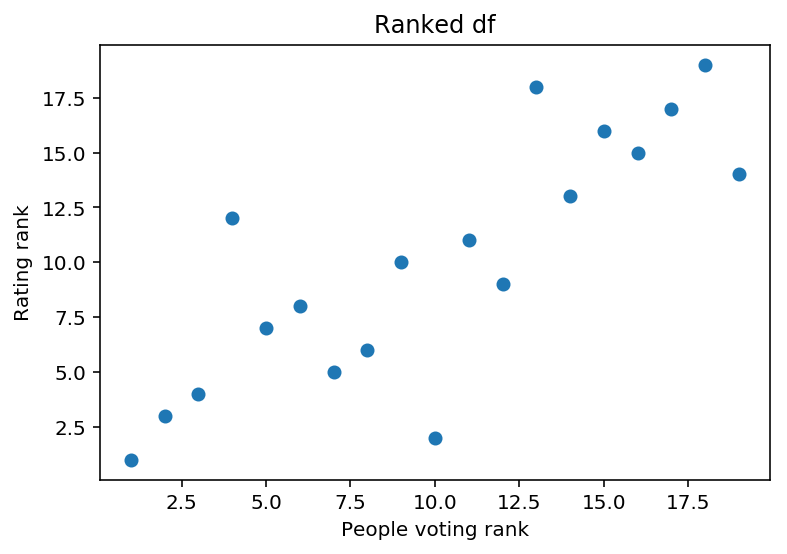

In [33]:
plt.scatter(ranked_df.people_vote, ranked_df.rating)
plt.title("Ranked df")
plt.xlabel("People voting rank")
plt.ylabel("Rating rank")

In [38]:
ranked_df.corr()

people_vote    rating
people_vote     1.000000  0.815789
rating          0.815789  1.000000

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts: write a function corr_days_from_last_contact_prev_campaign_contact(bank) which receives the band data frame and returns the required correlation.

In [43]:
bank_df = pd.read_csv("bank-full.csv")
bank_df.head(1)

age         job  marital education default_credit  balance housing_loan  \
0   58  management  married  tertiary             no     2143          yes   

  personal_loan  contact  day month  duration  campaign  \
0            no  unknown    5   may       261         1   

   days_from_last_contact  previous_campaign_contacts  \
0                      -1                           0   

  previous_campaign_outcome outcome  
0                   unknown      no

In [57]:
bank_df[["days_from_last_contact","previous_campaign_contacts"]].corr(method = "spearman")

days_from_last_contact  previous_campaign_contacts
days_from_last_contact                    1.000000                    0.985645
previous_campaign_contacts                0.985645                    1.000000

(b) Is there an actual linear correlation between the ranks? write a function is_bank_correlation() which returns True if you claim there is a linear correlation between the ranks and False otherwise (boolean). 

To back your claim, write a function show_bank_spearman_correlation(bank), which performs **a transformation of the bank data frame** and computes the spearman correlation as was done in clause (a). 

In [55]:
bank_rank = rank_df(bank_df[["days_from_last_contact","previous_campaign_contacts"]])

bank_rank.corr(method = "spearman")

days_from_last_contact  previous_campaign_contacts
days_from_last_contact                    1.000000                    0.985645
previous_campaign_contacts                0.985645                    1.000000